In [1]:
from google.colab import auth
auth.authenticate_user()
project_id = 'proyecto-02-404416'
from google.cloud import bigquery
client = bigquery.Client(project=project_id)
dataset_ref = client.dataset('data_set', project='proyecto-02-404416')
dataset = client.get_dataset(dataset_ref)
#Debe ser una tabla y no una view
table_ref = dataset_ref.table('tabla_colab')
table = client.get_table(table_ref)
table.schema
client.list_rows(table).to_dataframe()






,track_id_normalizado,track_name_normalizado,artist_s_name_normalizado,artist_count,in_spotify_playlists,in_spotify_charts,fecha_completa_lanzamiento,streams_limpio,in_apple_playlists,in_apple_charts,...,cat_fin_energy,cat_fin_acousticness,cat_fin_instrumentalness,cat_fin_liveness,cat_fin_speechiness,cat_fin_bpm,cat_fin_streams_limpio,sum_playlists,sum_streams_por_artista,n_canciones_por_artista
0,6363032,calm down,r,1,4013,10,2022-02-09,445763624,107,44,...,Alto,Bajo,Bajo,Bajo,Bajo,Bajo,Bajo,4870,445763624,1
1,3557036,the business,ti,1,14311,0,2020-01-01,1062345656,255,32,...,Bajo,Bajo,Bajo,Bajo,Bajo,Bajo,Alto,15148,1062345656,1
2,8452012,butter,bts,1,4779,6,2021-05-21,1143647827,180,135,...,Bajo,Bajo,Bajo,Bajo,Bajo,Bajo,Alto,5182,4389891591,8
3,1640645,eleven,ive,1,521,1,2021-12-01,247737946,17,89,...,Bajo,Bajo,Bajo,Bajo,Bajo,Bajo,Bajo,549,942190597,4
4,2587921,conceited,sza,1,899,0,2022-12-09,56870689,2,14,...,Bajo,Bajo,Bajo,Bajo,Bajo,Alto,Bajo,903,4557811204,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,5380546,fingers crossed,lauren spencer smith lauren spencer smith laur...,3,2235,0,2022-01-05,349585590,65,7,...,Bajo,Bajo,Bajo,Bajo,Bajo,Bajo,Bajo,2370,349585590,1
942,6909746,white christmas,bing crosby john scott trotter his orchestra ...,3,11940,0,1942-01-01,395591396,73,79,...,Bajo,Alto,Bajo,Bajo,Bajo,Bajo,Bajo,12136,395591396,1
943,2148200,happy xmas war is over,john lennon the harlem community choir the pla...,4,10829,0,1971-12-01,460492795,130,1,...,Bajo,Bajo,Bajo,Alto,Bajo,Alto,Bajo,11349,460492795,1
944,1647815,se le ve,arcangel de la ghetto justin quiles lenny tavr...,8,1560,0,2021-08-12,223319934,72,0,...,Alto,Bajo,Bajo,Bajo,Bajo,Bajo,Bajo,1632,223319934,1


In [31]:
df['acousticness__'].info

<bound method Series.info of 0      38
1      41
2       0
3       6
4       5
       ..
941    62
942    91
943    32
944    10
945    36
Name: acousticness__, Length: 946, dtype: Int64>

 **H1: STREAMS VS BPM**

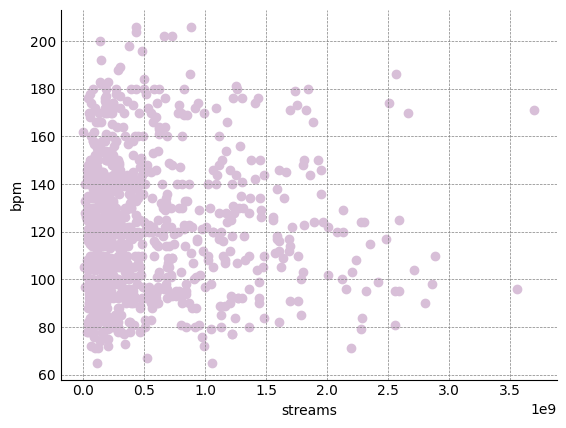

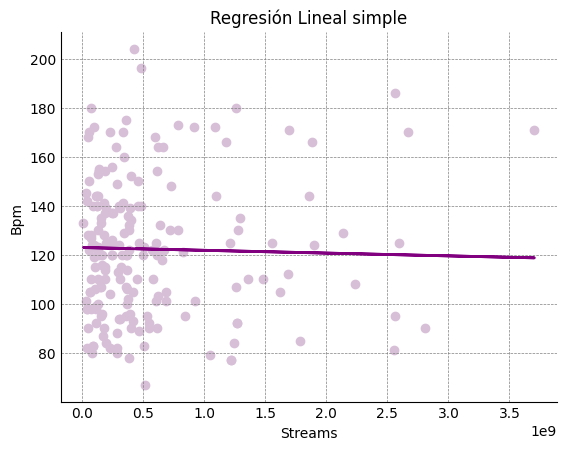


Datos del modelo Regresión Lineal Simple

Valor de la pendiente o coeficiente "a":
[[-1.13558889e-09]]
Valor de la intersección o coeficiente "b":
[122.96837194]

La ecuación del modelo es igual a:
y = [[-1.13558889e-09]] x [122.96837194]

Precisión del modelo:
0.0004934227081950793


In [2]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

# Suponiendo que 'df' es tu DataFrame
df = client.list_rows(table).to_dataframe()

# Seleccionar la columna 'streams_limpio'
X = df[['streams_limpio']]
Y = df[['bpm']]

# Grafico
plt.scatter(X, Y, color='thistle')
plt.xlabel("streams")
plt.ylabel("bpm")

# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)

# Eliminar las líneas de los ejes X e Y
plt.tick_params(axis='both', which='both', length=0)

# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()
print()

# IMPLEMENTACIÓN REGRESIÓN LINEAL SIMPLE

# Dividir la data en “entrenamiento” y “test”
from sklearn.model_selection import train_test_split

# Separar los datos de "train" en entrenamiento de prueba y prueba para probar algoritmos
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Definir el algoritmo a utilizar
lr = linear_model.LinearRegression()

# Entrenar el modelo
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)

# Graficamos los datos junto con el modelo
plt.scatter(X_test, Y_test, color='thistle')
plt.plot(X_test, Y_pred, color='purple', linewidth=2)
plt.title('Regresión Lineal simple')
plt.xlabel('Streams')
plt.ylabel('Bpm')

# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)

# Eliminar las líneas de los ejes X e Y
plt.tick_params(axis='both', which='both', length=0)

# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

print()
print('Datos del modelo Regresión Lineal Simple')
print()
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('y =', lr.coef_, 'x', lr.intercept_)

print()
print('Precisión del modelo:')
print(lr.score(X_train, Y_train))



** H1 STREAMS VS BPM 2022**

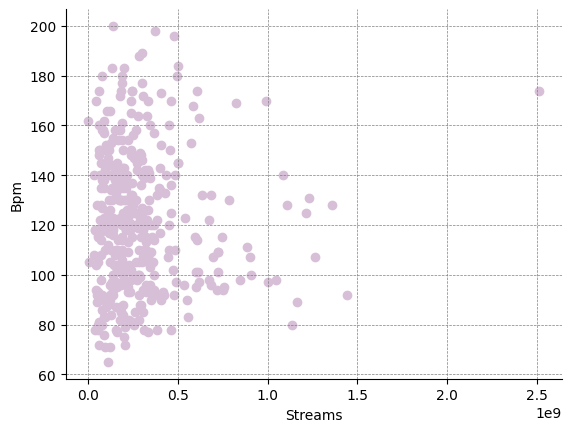

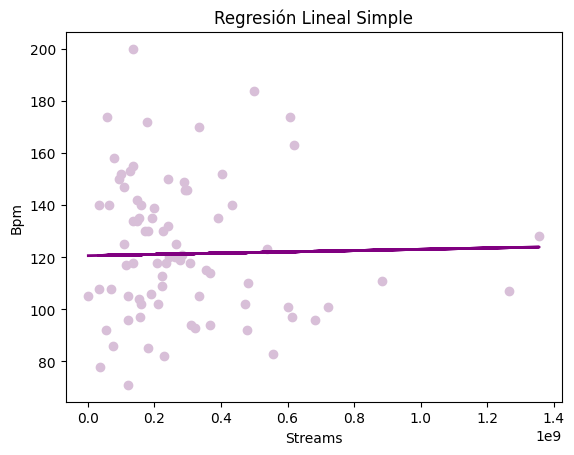


Datos del modelo Regresión Lineal Simple

Valor de la pendiente o coeficiente "a":
[[2.43308322e-09]]
Valor de la intersección o coeficiente "b":
[120.62467715]

La ecuación del modelo es igual a:
y = [[2.43308322e-09]] x + [120.62467715]

Precisión del modelo en los datos de prueba:
-0.009433066659291667


In [3]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import pandas as pd

# Suponiendo que 'df' es tu DataFrame
df['fecha_completa_lanzamiento'] = pd.to_datetime(df['fecha_completa_lanzamiento'])

# Añadir un operador de comparación correcto en la línea siguiente
df_filtrado = df.loc[df['fecha_completa_lanzamiento'].dt.year == 2022]

# Seleccionar la columna 'streams_limpio'
X = df_filtrado[['streams_limpio']]
Y = df_filtrado[['bpm']]

# Graficar
plt.scatter(X, Y,color='thistle')
plt.xlabel("Streams")
plt.ylabel("Bpm")
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
print()

# IMPLEMENTACIÓN REGRESIÓN LINEAL SIMPLE

# Dividir la data en “entrenamiento” y “test”
from sklearn.model_selection import train_test_split

# Separar los datos de "train" en entrenamiento de prueba y prueba para probar algoritmos
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Definir el algoritmo a utilizar
lr = linear_model.LinearRegression()

# Entrenar el modelo
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)

# Graficar los datos junto con el modelo
plt.scatter(X_test, Y_test,color='thistle')
plt.plot(X_test, Y_pred, color='purple', linewidth=2)
plt.title('Regresión Lineal Simple')
plt.xlabel('Streams')
plt.ylabel('Bpm')
plt.show()

# Mostrar información sobre el modelo
print()
print('Datos del modelo Regresión Lineal Simple')
print()
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('y =', lr.coef_, 'x +', lr.intercept_)

# Evaluar la precisión del modelo en los datos de prueba
print()
print('Precisión del modelo en los datos de prueba:')
print(lr.score(X_test, Y_test))

** CANCION MAS ESCUCHADA 2022**

In [4]:
import pandas as pd

# Suponiendo que 'df' es tu DataFrame y 'nombre_columna' es el nombre de la columna
df_filtrado = df.loc[df['fecha_completa_lanzamiento'].dt.year == 2022]

# Obtener el valor máximo en 'streams_limpio'
max_valor = df_filtrado['streams_limpio'].max()

# Obtener el nombre del artista asociado al valor máximo
artista_top = df_filtrado.loc[df_filtrado['streams_limpio'] == max_valor, 'artist_s_name_normalizado'].values[0]

cancion_top = df_filtrado.loc[df_filtrado['streams_limpio'] == max_valor, 'track_name_normalizado'].values[0]

print("La canción más escuchada se reprodujo:", max_valor)
print(f"La canción más escuchada es: {cancion_top}")
print(f" Y es de el artista : {artista_top}")

La canción más escuchada se reprodujo: 2513188493
La canción más escuchada es: as it was
 Y es de el artista : harry styles


**H2 : SPOTIFY CHARTS VS (APPLE CHARTS, DEEZER CHARTS)**

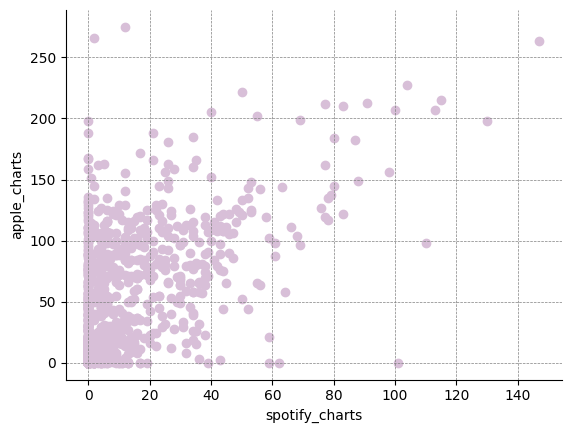

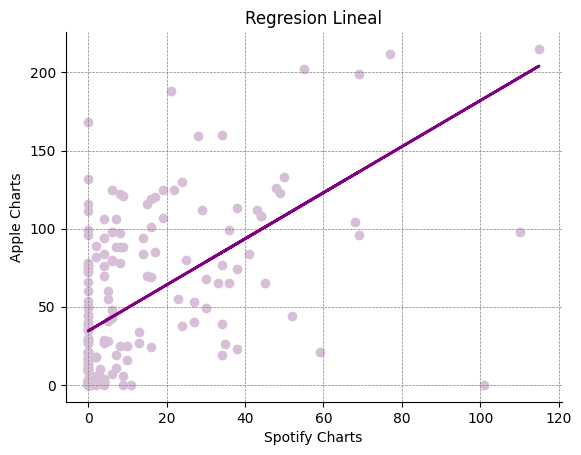


Datos del modelo Regresión Lineal Simple

Valor de la pendiente o coeficiente "a":
[[1.47434133]]
Valor de la intersección o coeficiente "b":
[34.53255165]

La ecuación del modelo es igual a:
y = [[1.47434133]] x [34.53255165]

Precisión del modelo:
0.3148277813550572


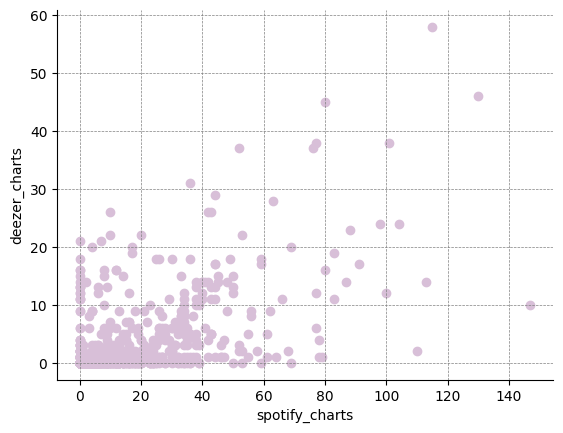

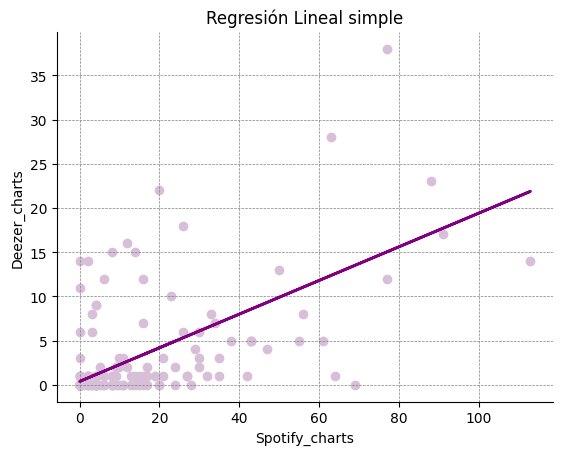


Datos del modelo Regresión Lineal Simple

Valor de la pendiente o coeficiente "a":
[[0.19027885]]
Valor de la intersección o coeficiente "b":
[0.37648248]

La ecuación del modelo es igual a:
C = [[0.19027885]] D [0.37648248]

Precisión del modelo:
0.3691240885520496


In [5]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

# Suponiendo que 'df' es tu DataFrame
df= client.list_rows(table).to_dataframe()

# Seleccionar la columna 'streams_limpio'
X = df[['in_spotify_charts']]
Y= df[['in_apple_charts']]

#grafico
plt.scatter(X,Y,color='thistle')
plt.xlabel ("spotify_charts")
plt.ylabel ("apple_charts")
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
print ()
#IMPLEMENTACIÓN REGRESIÓN LINEAL SIMPLE

#dividir la data en “entrenamiento” y “test”
from sklearn.model_selection import train_test_split

#separar los datos  de "train" en entrenamiento de prueba y prueba para probar algoritmos
X_train, X_test,Y_train, Y_test =train_test_split(X,Y, test_size=0.2)

#definir el algoritmo a ultilizar
lr=linear_model.LinearRegression()

#Entreno el modelo
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)


#graficamos los datos junto con el modelo
plt.scatter (X_test, Y_test,color='thistle')
plt.plot( X_test, Y_pred, color='purple', linewidth=2)
plt.title( 'Regresion Lineal')
plt.xlabel('Spotify Charts')
plt.ylabel ('Apple Charts')
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show ()

print()
print('Datos del modelo Regresión Lineal Simple')
print ()
print ('Valor de la pendiente o coeficiente "a":')
print (lr.coef_)
print ( 'Valor de la intersección o coeficiente "b":')
print (lr.intercept_)
print ()
print ('La ecuación del modelo es igual a:')
print ('y =', lr.coef_, 'x', lr.intercept_)

print()
print ('Precisión del modelo:')
print (lr.score (X_train, Y_train))


#SPOTIFY VS DEEZER
C = df[['in_spotify_charts']]
D= df[['in_deezer_charts']]

#grafico
plt.scatter(C,D,color='thistle')
plt.xlabel ("spotify_charts")
plt.ylabel ("deezer_charts")
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
print ()
#IMPLEMENTACIÓN REGRESIÓN LINEAL SIMPLE

#dividir la data en “entrenamiento” y “test”
from sklearn.model_selection import train_test_split

#separar los datos  de "train" en entrenamiento de prueba y prueba para probar algoritmos
C_train, C_test,D_train, D_test =train_test_split(C,D, test_size=0.2)

#definir el algoritmo a ultilizar
lr=linear_model.LinearRegression()

#Entreno el modelo
lr.fit(C_train, D_train)
D_pred = lr.predict(C_test)


#graficamos los datos junto con el modelo
plt.scatter (C_test, D_test,color='thistle')
plt.plot( C_test, D_pred, color='purple', linewidth=2)
plt.title( 'Regresión Lineal simple')
plt.xlabel('Spotify_charts')
plt.ylabel ('Deezer_charts')
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show ()

print()
print('Datos del modelo Regresión Lineal Simple')
print ()
print ('Valor de la pendiente o coeficiente "a":')
print (lr.coef_)
print ( 'Valor de la intersección o coeficiente "b":')
print (lr.intercept_)
print ()
print ('La ecuación del modelo es igual a:')
print ('C =', lr.coef_, 'D', lr.intercept_)

print()
print ('Precisión del modelo:')
print (lr.score (C_train, D_train))

#El algoritmo no es el mejor para este conjunto de datos


H3: STREAMS VS PLAYLISTS

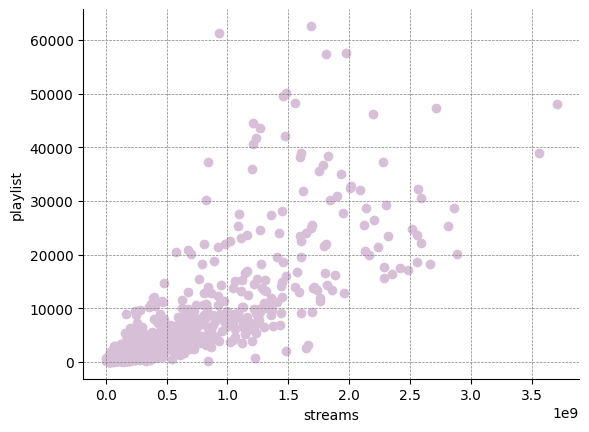

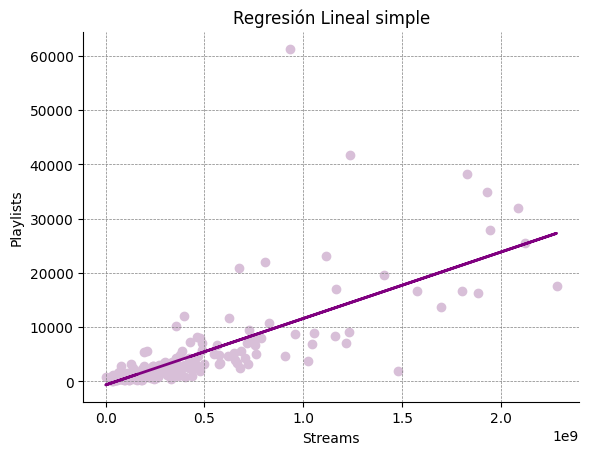


Datos del modelo Regresión Lineal Simple

Valor de la pendiente o coeficiente "a":
[[1.22530822e-05]]
Valor de la intersección o coeficiente "b":
[-662.80364746]

La ecuación del modelo es igual a:
y = [[1.22530822e-05]] x [-662.80364746]

Precisión del modelo:
0.6241241106227179


In [6]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt


# Seleccionar la columna 'streams_limpio'
A = df[['streams_limpio']]
B= df[['sum_playlists']]

#grafico
plt.scatter(A,B,color='thistle')
plt.xlabel ("streams")
plt.ylabel ("playlist")
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
print ()
#IMPLEMENTACIÓN REGRESIÓN LINEAL SIMPLE

#dividir la data en “entrenamiento” y “test”
from sklearn.model_selection import train_test_split

#separar los datos  de "train" en entrenamiento de prueba y prueba para probar algoritmos
A_train, A_test,B_train, B_test =train_test_split(A,B, test_size=0.2)

#definir el algoritmo a ultilizar
lr=linear_model.LinearRegression()

#Entreno el modelo
lr.fit(A_train, B_train)
B_pred = lr.predict(A_test)


#graficamos los datos junto con el modelo
plt.scatter (A_test, B_test, color='thistle')
plt.plot( A_test, B_pred, color='purple', linewidth=2)
plt.title( 'Regresión Lineal simple')
plt.xlabel('Streams')
plt.ylabel ('Playlists')
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show ()

print()
print('Datos del modelo Regresión Lineal Simple')
print ()
print ('Valor de la pendiente o coeficiente "a":')
print (lr.coef_)
print ( 'Valor de la intersección o coeficiente "b":')
print (lr.intercept_)
print ()
print ('La ecuación del modelo es igual a:')
print ('y =', lr.coef_, 'x', lr.intercept_)

print()
print ('Precisión del modelo:')
print (lr.score (A_train, B_train))



**H4: STREAMS VS ARTISTS NAME**

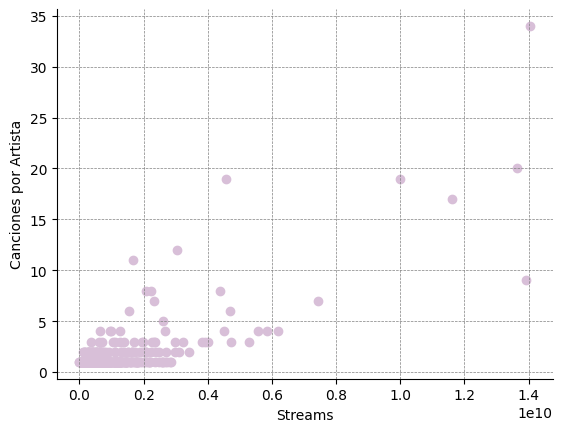

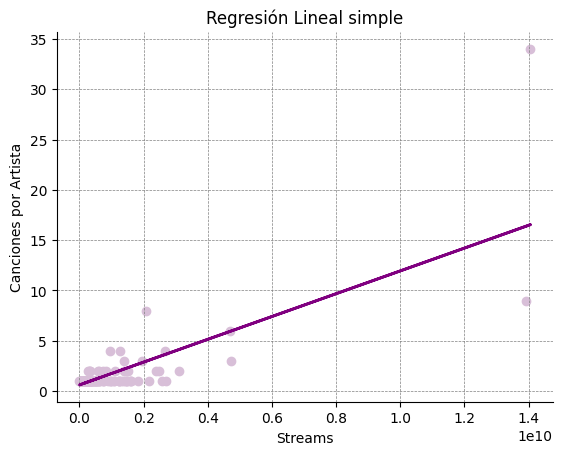


Datos del modelo Regresión Lineal Simple

Valor de la pendiente o coeficiente "a":
[[1.13300134e-09]]
Valor de la intersección o coeficiente "b":
[0.61590216]

La ecuación del modelo es igual a:
y = [[1.13300134e-09]] x [0.61590216]

Precisión del modelo:
0.5852463016883076


In [7]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import pandas as pd

total_streams_por_artista = df.groupby('artist_s_name_normalizado')['streams_limpio'].sum()

# Convertir a DataFrame
E = pd.DataFrame({'Streams': total_streams_por_artista.values})

# Obtener las frecuencias y ordenar alfabéticamente por el nombre del artista
I = df['artist_s_name_normalizado'].value_counts().sort_index()

# Convertir a DataFrame
J = pd.DataFrame({'CancionesporArtista': I.values})


# Grafico
plt.scatter(E, J,color='thistle')
plt.xlabel("Streams")
plt.ylabel("Canciones por Artista")
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
print()

# IMPLEMENTACIÓN REGRESIÓN LINEAL SIMPLE

# Dividir la data en "entrenamiento" y "test"
from sklearn.model_selection import train_test_split

# Separar los datos de "train" en entrenamiento y prueba para probar algoritmos
E_train, E_test, J_train, J_test = train_test_split(E, J, test_size=0.2)

# Definir el algoritmo a utilizar
lr = linear_model.LinearRegression()

# Entrenar el modelo
lr.fit(E_train, J_train)
J_pred = lr.predict(E_test)

# Graficar los datos junto con el modelo
plt.scatter(E_test, J_test,color='thistle')
plt.plot(E_test, J_pred, color='purple', linewidth=2)
plt.title('Regresión Lineal simple')
plt.xlabel('Streams')
plt.ylabel('Canciones por Artista')
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

print()
print('Datos del modelo Regresión Lineal Simple')
print()
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)
print()
print ('La ecuación del modelo es igual a:')
print ('y =', lr.coef_, 'x', lr.intercept_)

print()
print('Precisión del modelo:')
print(lr.score(E_train, J_train))

In [8]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import pandas as pd

total_streams_por_artista = df.groupby('artist_s_name_normalizado')['streams_limpio'].sum()

# Convertir a DataFrame
E = pd.DataFrame({'Streams': total_streams_por_artista.values})

# Obtener las frecuencias
I = df['artist_s_name_normalizado'].value_counts()

# Convertir a DataFrame
J = pd.DataFrame({'CancionesporArtista': I.values})

**H5: STREAMS VS CARACTERISTICAS**


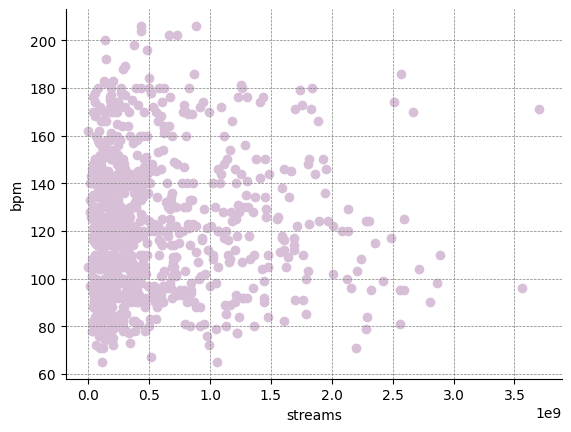

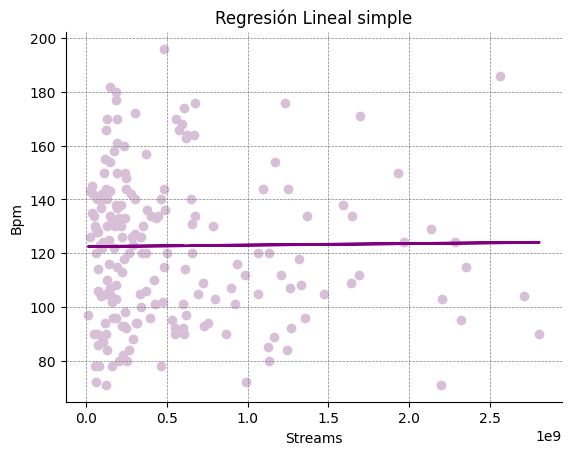


Datos del modelo Regresión Lineal Simple

Valor de la pendiente o coeficiente "a":
[[5.59964991e-10]]
Valor de la intersección o coeficiente "b":
[122.46278503]

La ecuación del modelo es igual a:
y = [[5.59964991e-10]] x [122.46278503]

Precisión del modelo:
0.00012408244139405777


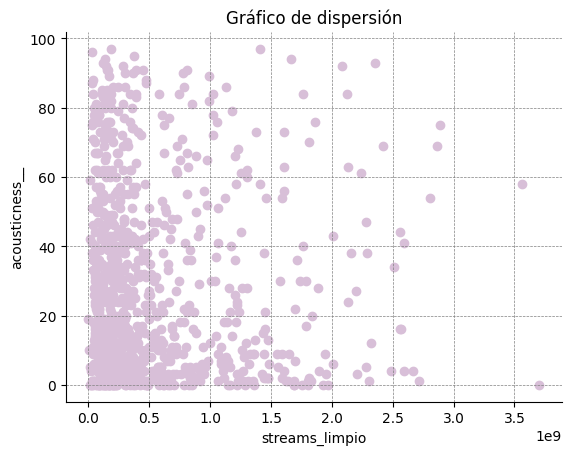

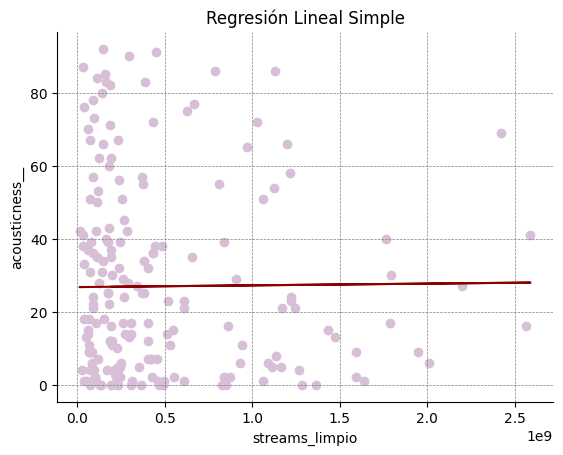


DATOS MODELO REGRESIÓN LINEAL SIMPLE

Valor de la pendiente o coeficiente "a":
[[4.74935228e-10]]
Valor de la intersección o coeficiente "b":
[26.74953925]

La ecuación del modelo es igual a:
ac = [[4.74935228e-10]] X [26.74953925]

Precisión del modelo:
0.00011044821126759974


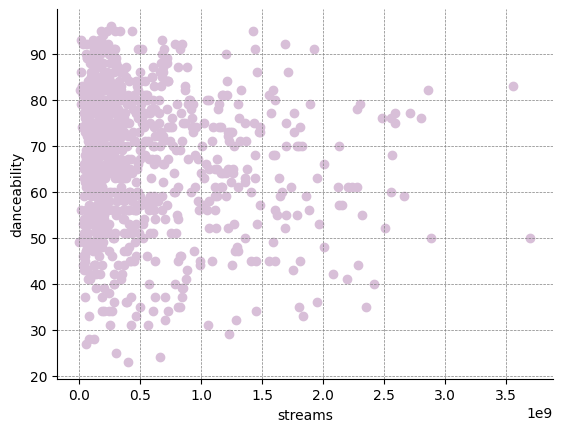

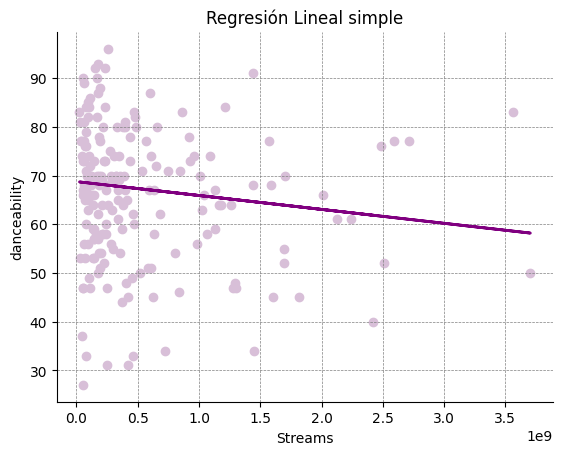


Datos del modelo Regresión Lineal Simple

Valor de la pendiente o coeficiente "a":
[[-2.85568689e-09]]
Valor de la intersección o coeficiente "b":
[68.75730383]

La ecuación del modelo es igual a:
y = [[-2.85568689e-09]] x [68.75730383]

Precisión del modelo:
0.010934373264929742


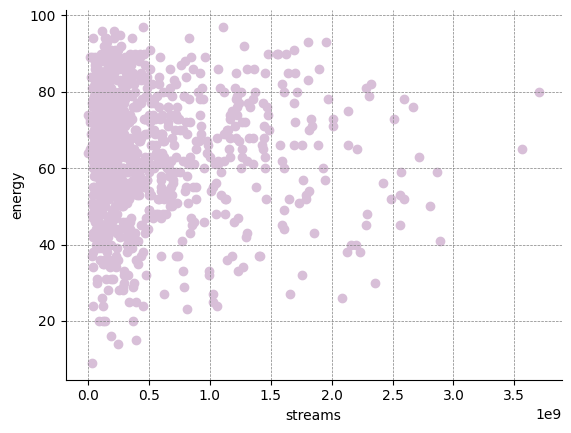

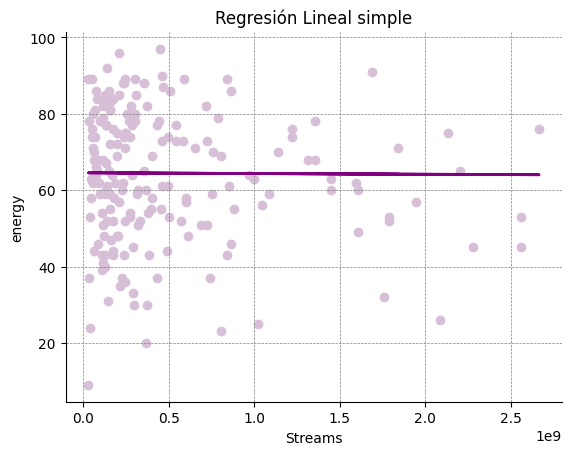


Datos del modelo Regresión Lineal Simple

Valor de la pendiente o coeficiente "a":
[[-1.8727147e-10]]
Valor de la intersección o coeficiente "b":
[64.55084133]

La ecuación del modelo es igual a:
y = [[-1.8727147e-10]] x [64.55084133]

Precisión del modelo:
4.234482704801312e-05


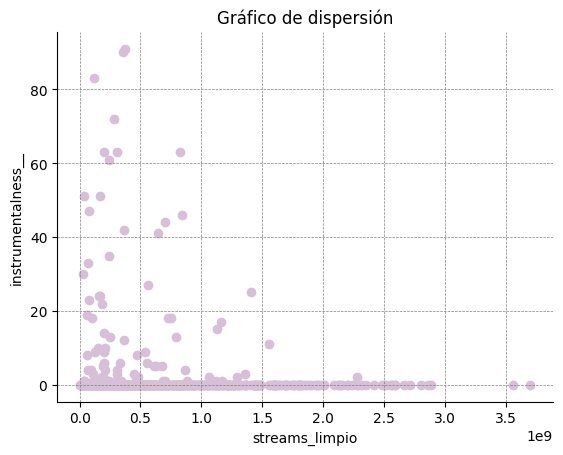

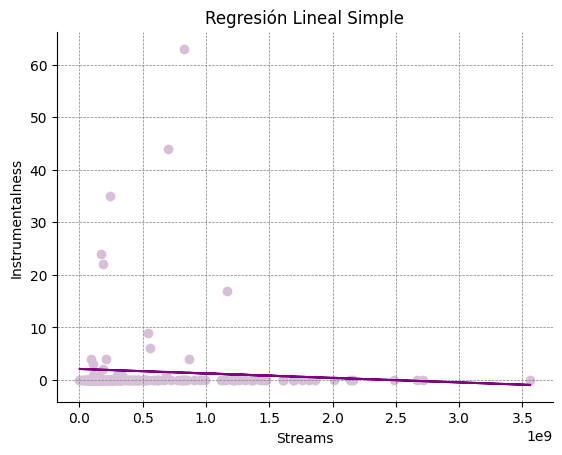


DATOS MODELO REGRESION LINEAL SIMPLE

Valor de la pendiente o coeficiente "a":
[[-8.53950825e-10]]
Valor de la intersección o coeficiente "b":
[2.0789768]

La ecuación del modelo es igual a:
Y= [[-8.53950825e-10]] X [2.0789768]

Presición del  modelo:
0.0029576882641590974


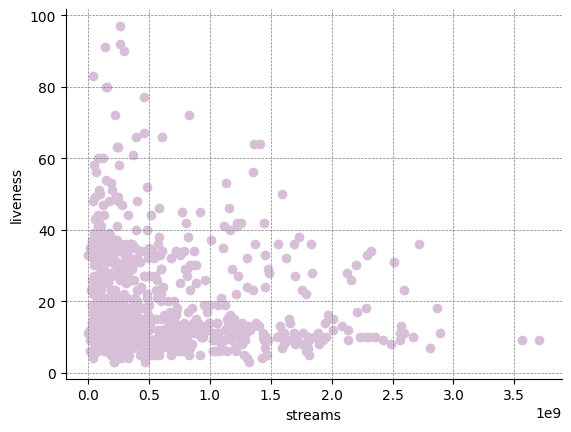

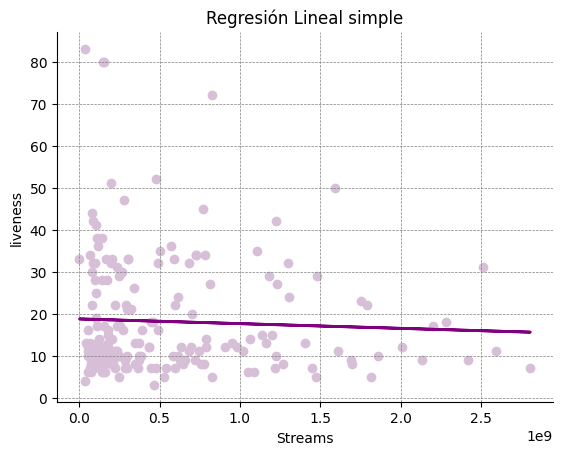


Datos del modelo Regresión Lineal Simple

Valor de la pendiente o coeficiente "a":
[[-1.12134808e-09]]
Valor de la intersección o coeficiente "b":
[18.71465158]

La ecuación del modelo es igual a:
y = [[-1.12134808e-09]] x [18.71465158]

Precisión del modelo:
0.002162948010442256


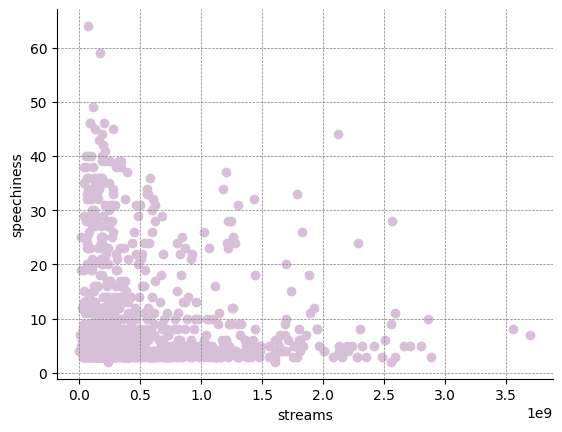

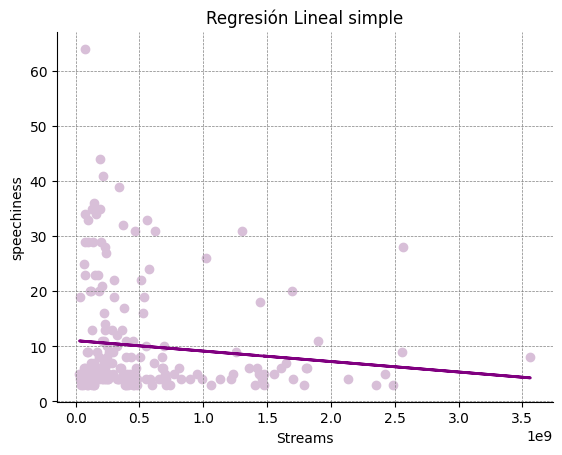


Datos del modelo Regresión Lineal Simple

Valor de la pendiente o coeficiente "a":
[[-1.89829083e-09]]
Valor de la intersección o coeficiente "b":
[11.04177698]

La ecuación del modelo es igual a:
y = [[-1.89829083e-09]] x [11.04177698]

Precisión del modelo:
0.011657936108437794


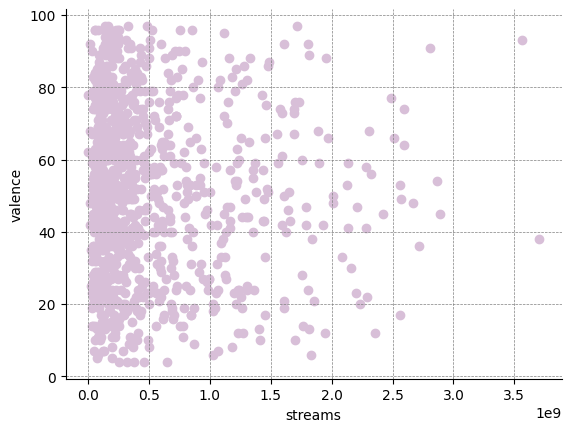

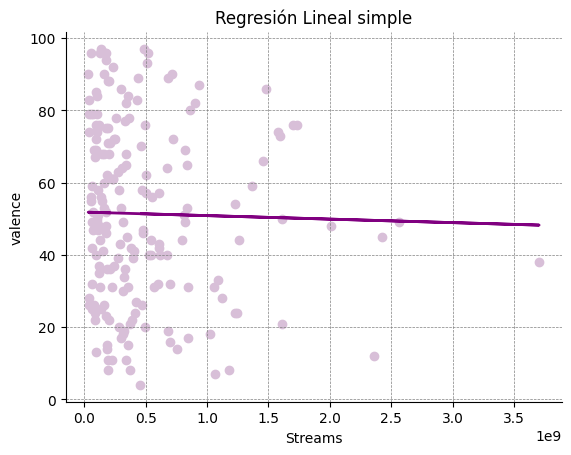


Datos del modelo Regresión Lineal Simple

Valor de la pendiente o coeficiente "a":
[[-9.70441638e-10]]
Valor de la intersección o coeficiente "b":
[51.83175501]

La ecuación del modelo es igual a:
y = [[-9.70441638e-10]] x [51.83175501]

Precisión del modelo:
0.000580037272259526


In [11]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

# Suponiendo que 'df' es tu DataFrame
df= client.list_rows(table).to_dataframe()




# Seleccionar la columna 'streams_limpio'
X = df[['streams_limpio']]
Y= df[['bpm']]

#grafico
plt.scatter(X,Y,color='thistle')
plt.xlabel ("streams")
plt.ylabel ("bpm")
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
print ()
#IMPLEMENTACIÓN REGRESIÓN LINEAL SIMPLE

#dividir la data en “entrenamiento” y “test”
from sklearn.model_selection import train_test_split

#separar los datos  de "train" en entrenamiento de prueba y prueba para probar algoritmos
X_train, X_test,Y_train, Y_test =train_test_split(X,Y, test_size=0.2)

#definir el algoritmo a ultilizar
lr=linear_model.LinearRegression()

#Entreno el modelo
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)


#graficamos los datos junto con el modelo
plt.scatter (X_test, Y_test,color='thistle')
plt.plot( X_test, Y_pred, color='purple', linewidth=2)
plt.title( 'Regresión Lineal simple')
plt.xlabel('Streams')
plt.ylabel ('Bpm')
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show ()

print()
print('Datos del modelo Regresión Lineal Simple')
print ()
print ('Valor de la pendiente o coeficiente "a":')
print (lr.coef_)
print ( 'Valor de la intersección o coeficiente "b":')
print (lr.intercept_)
print ()
print ('La ecuación del modelo es igual a:')
print ('y =', lr.coef_, 'x', lr.intercept_)

print()
print ('Precisión del modelo:')
print (lr.score (X_train, Y_train))


#ACOUSTICNESS
ac =  df[['acousticness__']]
# Gráfico de dispersión
plt.scatter(X, ac, color='thistle')
plt.xlabel("streams_limpio")
plt.ylabel("acousticness__")
# Título del gráfico
plt.title("Gráfico de dispersión")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
# Implementación Regresión Lineal Simple
# Dividir la data en “entrenamiento” y “test”
from sklearn.model_selection import train_test_split
# Separar los datos de "train" en entrenamiento y prueba para probar algoritmos
X_train, X_test, ac_train, ac_test = train_test_split(X, ac, test_size=0.2)
# Definir el algoritmo a utilizar
lr = linear_model.LinearRegression()
# Entrenar el modelo
lr.fit(X_train, ac_train)
# Realizar predicción
ac_pred = lr.predict(X_test)
# Graficar los datos juntos con el modelo (puntos rosados y línea negra)
plt.scatter(X_test, ac_test, color='thistle')
plt.plot(X_test, ac_pred, color="darkred", linewidth=1.5)
plt.title("Regresión Lineal Simple")
plt.xlabel("streams_limpio")
plt.ylabel("acousticness__")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
# Imprimir
print()
print('DATOS MODELO REGRESIÓN LINEAL SIMPLE')
print()
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('ac =', lr.coef_, 'X', lr.intercept_)
print()
print('Precisión del modelo:')
print(lr.score(X_train, ac_train))



#DANCEABILLITY
db= df[['danceability__']]
#grafico
plt.scatter(X,db,color='thistle')
plt.xlabel ("streams")
plt.ylabel ("danceability")
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
print ()
#IMPLEMENTACIÓN REGRESIÓN LINEAL SIMPLE
from sklearn.model_selection import train_test_split
X_train, X_test,db_train, db_test =train_test_split(X,db, test_size=0.2)
lr=linear_model.LinearRegression()
lr.fit(X_train, db_train)
db_pred = lr.predict(X_test)
plt.scatter (X_test, db_test,color='thistle')
plt.plot( X_test, db_pred, color='purple', linewidth=2)
plt.title( 'Regresión Lineal simple')
plt.xlabel('Streams')
plt.ylabel ('danceability')
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show ()
print()
print('Datos del modelo Regresión Lineal Simple')
print ()
print ('Valor de la pendiente o coeficiente "a":')
print (lr.coef_)
print ( 'Valor de la intersección o coeficiente "b":')
print (lr.intercept_)
print ()
print ('La ecuación del modelo es igual a:')
print ('y =', lr.coef_, 'x', lr.intercept_)
print()
print ('Precisión del modelo:')
print (lr.score (X_train, db_train))

#ENERGY
eg= df[['energy__']]
#grafico
plt.scatter(X,eg,color='thistle')
plt.xlabel ("streams")
plt.ylabel ("energy")
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
print ()
#IMPLEMENTACIÓN REGRESIÓN LINEAL SIMPLE
from sklearn.model_selection import train_test_split
X_train, X_test,eg_train, eg_test =train_test_split(X,eg, test_size=0.2)
lr=linear_model.LinearRegression()
lr.fit(X_train, eg_train)
eg_pred = lr.predict(X_test)
plt.scatter (X_test, eg_test,color='thistle')
plt.plot( X_test, eg_pred, color='purple', linewidth=2)
plt.title( 'Regresión Lineal simple')
plt.xlabel('Streams')
plt.ylabel ('energy')
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show ()
print()
print('Datos del modelo Regresión Lineal Simple')
print ()
print ('Valor de la pendiente o coeficiente "a":')
print (lr.coef_)
print ( 'Valor de la intersección o coeficiente "b":')
print (lr.intercept_)
print ()
print ('La ecuación del modelo es igual a:')
print ('y =', lr.coef_, 'x', lr.intercept_)
print()
print ('Precisión del modelo:')
print (lr.score (X_train, eg_train))


#Instrumentalness
im=  df[['instrumentalness__']]
#grafico de dispersión
plt.scatter(X, im, color='thistle')
plt.xlabel ("streams_limpio")
plt.ylabel ("instrumentalness__")
# Título del gráfico
plt.title("Gráfico de dispersión")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#IMPLEMENTACIÓN REGRESIÓN LINEAL SIMPLE
#dividir la data en “entrenamiento” y “test”
from sklearn.model_selection import train_test_split
#separar los datos  de "train" en entrenamiento de prueba y prueba para probar algoritmos
X_train, X_test,im_train, im_test =train_test_split(X,im, test_size=0.2)
#definir el algoritmo a ultilizar
lr=linear_model.LinearRegression()
#Entreno el modelo
lr.fit(X_train, im_train)
#realiza prediccion
im_pred=lr.predict(X_test)
# Graficar los datos juntos con el modelo (puntos rosados y línea negra)
plt.scatter(X_test, im_test, color='thistle')
plt.plot(X_test, im_pred, color="purple", linewidth=1.5)
plt.title("Regresión Lineal Simple")
plt.xlabel("Streams")
plt.ylabel("Instrumentalness")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#imprimir
print()
print('DATOS MODELO REGRESION LINEAL SIMPLE')
print()
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('Y=',lr.coef_,'X', lr.intercept_)
print()
print('Presición del  modelo:')
print(lr.score(X_train,im_train))


#LIVENESS
ln= df[['liveness__']]
#grafico
plt.scatter(X,ln,color='thistle')
plt.xlabel ("streams")
plt.ylabel ("liveness")
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
print ()
#IMPLEMENTACIÓN REGRESIÓN LINEAL SIMPLE
from sklearn.model_selection import train_test_split
X_train, X_test,ln_train, ln_test =train_test_split(X,ln, test_size=0.2)
lr=linear_model.LinearRegression()
lr.fit(X_train, ln_train)
ln_pred = lr.predict(X_test)
plt.scatter (X_test, ln_test,color='thistle')
plt.plot( X_test, ln_pred, color='purple', linewidth=2)
plt.title( 'Regresión Lineal simple')
plt.xlabel('Streams')
plt.ylabel ('liveness')
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show ()
print()
print('Datos del modelo Regresión Lineal Simple')
print ()
print ('Valor de la pendiente o coeficiente "a":')
print (lr.coef_)
print ( 'Valor de la intersección o coeficiente "b":')
print (lr.intercept_)
print ()
print ('La ecuación del modelo es igual a:')
print ('y =', lr.coef_, 'x', lr.intercept_)
print()
print ('Precisión del modelo:')
print (lr.score (X_train, ln_train))

#SPEECHINESS
sp= df[['speechiness__']]
#grafico
plt.scatter(X,sp,color='thistle')
plt.xlabel ("streams")
plt.ylabel ("speechiness")
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
print ()
#IMPLEMENTACIÓN REGRESIÓN LINEAL SIMPLE
from sklearn.model_selection import train_test_split
X_train, X_test,sp_train, sp_test =train_test_split(X,sp, test_size=0.2)
lr=linear_model.LinearRegression()
lr.fit(X_train, sp_train)
sp_pred = lr.predict(X_test)
plt.scatter (X_test, sp_test,color='thistle')
plt.plot( X_test, sp_pred, color='purple', linewidth=2)
plt.title( 'Regresión Lineal simple')
plt.xlabel('Streams')
plt.ylabel ('speechiness')
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show ()
print()
print('Datos del modelo Regresión Lineal Simple')
print ()
print ('Valor de la pendiente o coeficiente "a":')
print (lr.coef_)
print ( 'Valor de la intersección o coeficiente "b":')
print (lr.intercept_)
print ()
print ('La ecuación del modelo es igual a:')
print ('y =', lr.coef_, 'x', lr.intercept_)
print()
print ('Precisión del modelo:')
print (lr.score (X_train, sp_train))

#VALENCE
vl= df[['valence__']]
#grafico
plt.scatter(X,vl,color='thistle')
plt.xlabel ("streams")
plt.ylabel ("valence")
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
print ()
#IMPLEMENTACIÓN REGRESIÓN LINEAL SIMPLE
from sklearn.model_selection import train_test_split
X_train, X_test,vl_train, vl_test =train_test_split(X,vl, test_size=0.2)
lr=linear_model.LinearRegression()
lr.fit(X_train, vl_train)
vl_pred = lr.predict(X_test)
plt.scatter (X_test, vl_test,color='thistle')
plt.plot( X_test, vl_pred, color='purple', linewidth=2)
plt.title( 'Regresión Lineal simple')
plt.xlabel('Streams')
plt.ylabel ('valence')
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show ()
print()
print('Datos del modelo Regresión Lineal Simple')
print ()
print ('Valor de la pendiente o coeficiente "a":')
print (lr.coef_)
print ( 'Valor de la intersección o coeficiente "b":')
print (lr.intercept_)
print ()
print ('La ecuación del modelo es igual a:')
print ('y =', lr.coef_, 'x', lr.intercept_)
print()
print ('Precisión del modelo:')
print (lr.score (X_train, vl_train))

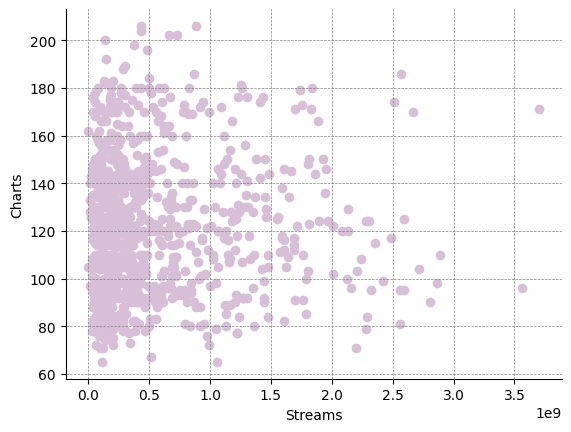

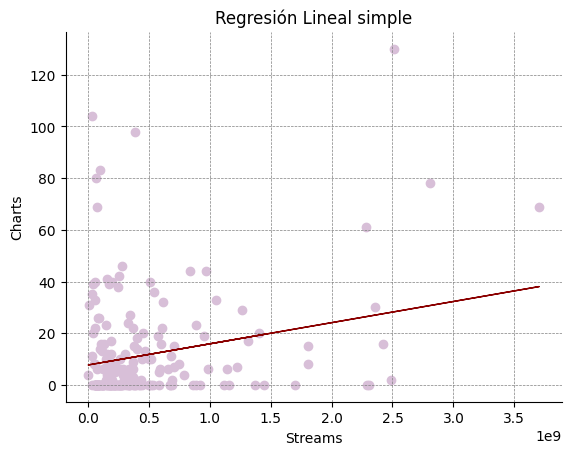


Datos del modelo Regresión Lineal Simple

Valor de la pendiente o coeficiente "a":
[[8.18995973e-09]]
Valor de la intersección o coeficiente "b":
[7.71126958]

La ecuación del modelo es igual a:
y = [[8.18995973e-09]] x [7.71126958]

Precisión del modelo:
0.05644345034200071


In [13]:
#H12
ch= df[['in_spotify_charts']]
#grafico
plt.scatter(X,Y,color= 'Thistle')
plt.xlabel ("Streams")
plt.ylabel ("Charts")
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
print ()
#IMPLEMENTACIÓN REGRESIÓN LINEAL SIMPLE
from sklearn.model_selection import train_test_split
X_train, X_test,ch_train, ch_test =train_test_split(X,ch, test_size=0.2)
lr=linear_model.LinearRegression()
lr.fit(X_train, ch_train)
ch_pred = lr.predict(X_test)
plt.scatter (X_test, ch_test,color='Thistle')
plt.plot( X_test, ch_pred, color='darkred', linewidth=1)
plt.title( 'Regresión Lineal simple')
plt.xlabel('Streams')
plt.ylabel ('Charts')
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show ()
print()
print('Datos del modelo Regresión Lineal Simple')
print ()
print ('Valor de la pendiente o coeficiente "a":')
print (lr.coef_)
print ( 'Valor de la intersección o coeficiente "b":')
print (lr.intercept_)
print ()
print ('La ecuación del modelo es igual a:')
print ('y =', lr.coef_, 'x', lr.intercept_)
print()
print ('Precisión del modelo:')
print (lr.score (X_train, ch_train))




**Streams vs charts año 2022**

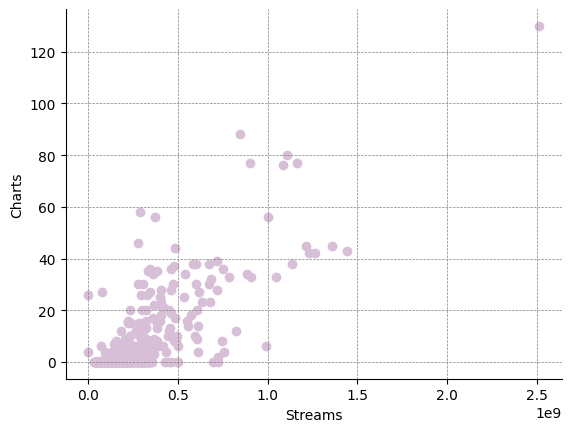

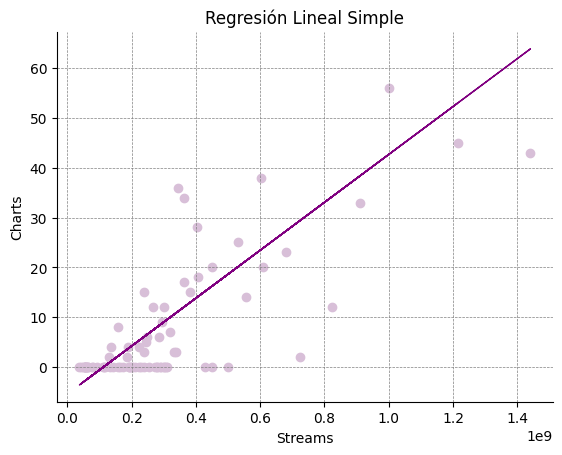


Datos del modelo Regresión Lineal Simple
Valor de la pendiente o coeficiente "a":
[[4.80587352e-08]]
Valor de la intersección o coeficiente "b":
[-5.39853827]

La ecuación del modelo es igual a:
y = [[4.80587352e-08]] x [-5.39853827]

Precisión del modelo:
0.5958850527008678


In [9]:
import pandas as pd
df['fecha_completa_lanzamiento'] = pd.to_datetime(df['fecha_completa_lanzamiento'])

# Filtrar datos para el año 2022
df_2022 = df[df['fecha_completa_lanzamiento'].dt.year == 2022]
# Seleccionar las variables independiente (X) y dependiente (Y)
X = df_2022[['streams_limpio']]
Y = df_2022[['in_spotify_charts']]
# Graficar
plt.scatter(X, Y, color='thistle')
plt.xlabel("Streams")
plt.ylabel("Charts")
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
print()
# Implementación de la Regresión Lineal Simple
from sklearn.model_selection import train_test_split
from sklearn import linear_model
# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, ch_train, ch_test = train_test_split(X, Y, test_size=0.2)
# Inicializar el modelo de regresión lineal
lr = linear_model.LinearRegression()
# Ajustar el modelo con los datos de entrenamiento
lr.fit(X_train, ch_train)
# Predecir con los datos de prueba
ch_pred = lr.predict(X_test)
# Graficar la regresión lineal
plt.scatter(X_test, ch_test, color='thistle')
plt.plot(X_test, ch_pred, color='purple', linewidth=1)
plt.title('Regresión Lineal Simple')
plt.xlabel('Streams')
plt.ylabel('Charts')
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
print()
# Mostrar detalles del modelo
print('Datos del modelo Regresión Lineal Simple')
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('y =', lr.coef_, 'x', lr.intercept_)
print()
print('Precisión del modelo:')
print(lr.score(X_train, ch_train))



**Streams vs charts 2023**

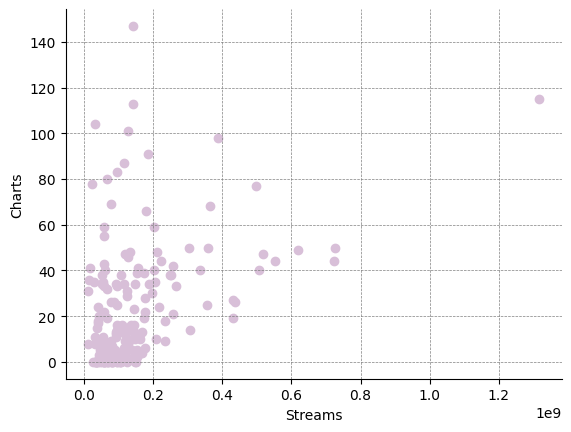

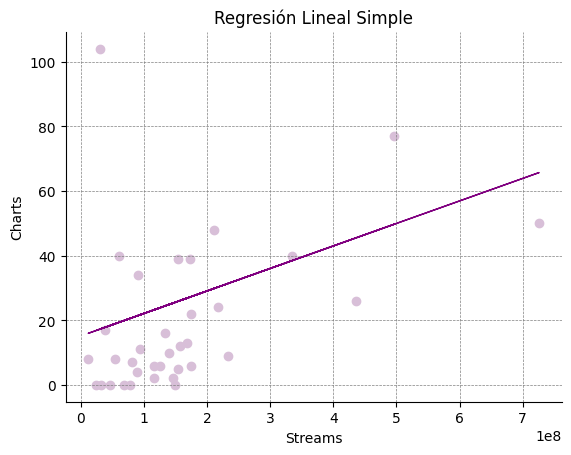


Datos del modelo Regresión Lineal Simple
Valor de la pendiente o coeficiente "a":
[[6.96949559e-08]]
Valor de la intersección o coeficiente "b":
[15.13177215]

La ecuación del modelo es igual a:
y = [[6.96949559e-08]] x [15.13177215]

Precisión del modelo:
0.15741498635270157


In [10]:
import pandas as pd
df['fecha_completa_lanzamiento'] = pd.to_datetime(df['fecha_completa_lanzamiento'])

# Filtrar datos para el año 2023
df_2023 = df[df['fecha_completa_lanzamiento'].dt.year == 2023]
# Seleccionar las variables independiente (X) y dependiente (Y)
X = df_2023[['streams_limpio']]
Y = df_2023[['in_spotify_charts']]
# Graficar
plt.scatter(X, Y, color='thistle')
plt.xlabel("Streams")
plt.ylabel("Charts")
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
print()
# Implementación de la Regresión Lineal Simple
from sklearn.model_selection import train_test_split
from sklearn import linear_model
# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, ch_train, ch_test = train_test_split(X, Y, test_size=0.2)
# Inicializar el modelo de regresión lineal
lr = linear_model.LinearRegression()
# Ajustar el modelo con los datos de entrenamiento
lr.fit(X_train, ch_train)
# Predecir con los datos de prueba
ch_pred = lr.predict(X_test)
# Graficar la regresión lineal
plt.scatter(X_test, ch_test, color='thistle')
plt.plot(X_test, ch_pred, color='purple', linewidth=1)
plt.title('Regresión Lineal Simple')
plt.xlabel('Streams')
plt.ylabel('Charts')
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
print()
# Mostrar detalles del modelo
print('Datos del modelo Regresión Lineal Simple')
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('y =', lr.coef_, 'x', lr.intercept_)
print()
print('Precisión del modelo:')
print(lr.score(X_train, ch_train))
